In [44]:
import pandas as pd
from scipy import stats
import numpy as np

In [3]:
datafile = "PlantGrowth.csv"
data = pd.read_csv(datafile)
data

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


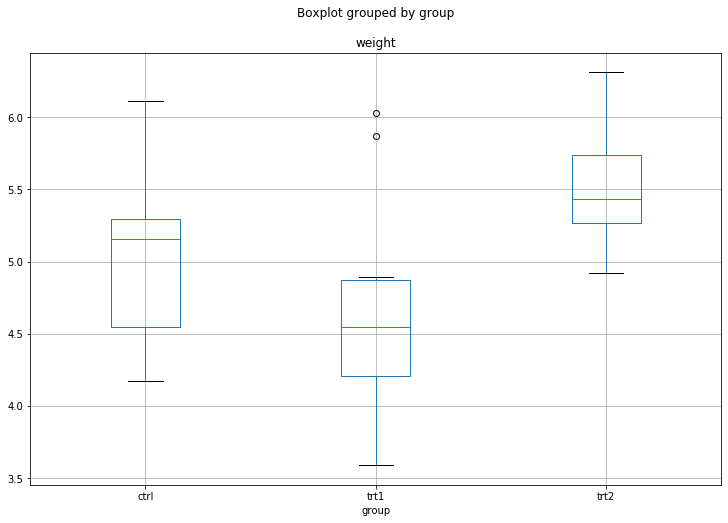

In [4]:
#Create a boxplot
data.boxplot('weight', by='group', figsize=(12, 8))

In [8]:
ctrl=data.weight[data.group=='ctrl']
ctrl

0    4.17
1    5.58
2    5.18
3    6.11
4    4.50
5    4.61
6    5.17
7    4.53
8    5.33
9    5.14
Name: weight, dtype: float64

In [10]:
grps = pd.unique(data.group.values)
grps

array(['ctrl', 'trt1', 'trt2'], dtype=object)

In [19]:
d_data = {grp:data['weight'][data.group == grp] for grp in grps}

{'ctrl': 0    4.17
 1    5.58
 2    5.18
 3    6.11
 4    4.50
 5    4.61
 6    5.17
 7    4.53
 8    5.33
 9    5.14
 Name: weight, dtype: float64,
 'trt1': 10    4.81
 11    4.17
 12    4.41
 13    3.59
 14    5.87
 15    3.83
 16    6.03
 17    4.89
 18    4.32
 19    4.69
 Name: weight, dtype: float64,
 'trt2': 20    6.31
 21    5.12
 22    5.54
 23    5.50
 24    5.37
 25    5.29
 26    4.92
 27    6.15
 28    5.80
 29    5.26
 Name: weight, dtype: float64}

In [28]:
k = len(pd.unique(data.group))  # number of conditions
N = len(data.values)  # conditions times participants
n = data.groupby('group').size()[0] #Participants in each condition

METHOD 1

In [36]:
F, p = stats.f_oneway(d_data['ctrl'], d_data['trt1'], d_data['trt2'])

In [31]:
F

4.846087862380136

In [32]:
p

0.0159099583256229

METHOD 2

In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('weight ~ group',
                data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

            sum_sq    df         F   PR(>F)
group      3.76634   2.0  4.846088  0.01591
Residual  10.49209  27.0       NaN      NaN


METHOD 3

In [37]:
import pingouin as pg

In [39]:
aov = pg.anova(data=data, dv='weight', between='group', detailed=True)
print(aov)

   Source        SS  DF        MS         F    p-unc       np2
0   group   3.76634   2  1.883170  4.846088  0.01591  0.264148
1  Within  10.49209  27  0.388596       NaN      NaN       NaN


In [40]:
datafile = "Diet.csv"
data = pd.read_csv(datafile)
data

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2
74,75,1,49,177,84,3,79.9
75,76,1,28,164,85,3,79.7
76,77,1,40,167,87,3,77.8


In [41]:
aov = pg.anova(data=data, dv='weight6weeks', between='Diet', detailed=True)
print(aov)

   Source           SS  DF         MS         F     p-unc       np2
0    Diet    29.841339   2  14.920670  0.183362  0.832839  0.004866
1  Within  6102.959815  75  81.372798       NaN       NaN       NaN


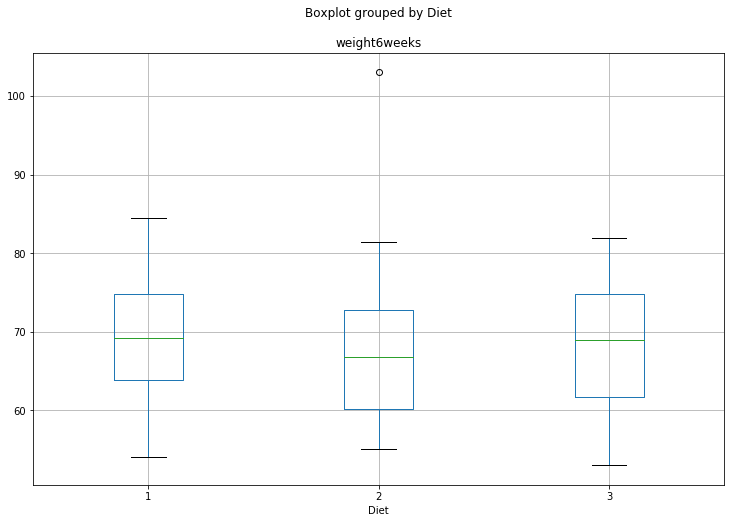

In [42]:
data.boxplot('weight6weeks', by='Diet', figsize=(12, 8))

T-test

In [61]:
mean, cov, n = [4, 5], [(1, .6), (.6, 1)], 30
x, y = np.random.multivariate_normal(mean, cov, n).T

In [62]:
x.mean()

4.2179266812628535

In [63]:
y.mean()

5.220117965214084

In [64]:
pg.ttest(x, y)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-3.363915,58,two-sided,0.001367,"[-1.6, -0.41]",0.868559,23.826,0.91113


Features of pg (pingouin)

In [65]:
pg.corr(x, y)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,30,0.667389,"[0.4, 0.83]",0.445408,0.404327,0.000056,516.342,0.988803


In [59]:
# Introduce an outlier
x[5] = 18
# Use the robust Shepherd's pi correlation
pg.corr(x, y, method="shepherd")

,n,outliers,r,CI95%,r2,adj_r2,p-val,power
shepherd,30,1,0.550246,"[0.24, 0.76]",0.302771,0.251124,0.001984,0.903194


In [69]:
print(pg.normality(x))                                    # Univariate normality
print(pg.multivariate_normality(np.column_stack((x, y)))) # Multivariate normality

          W      pval  normal
0  0.937648  0.078627    True
HZResults(hz=0.401715375654097, pval=0.552977792856891, normal=True)


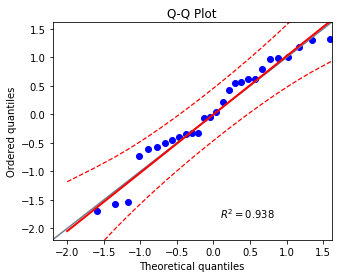

In [72]:
ax = pg.qqplot(x, dist='norm')

Text(0.5, 1.0, 'Effect of meditation on school performance')

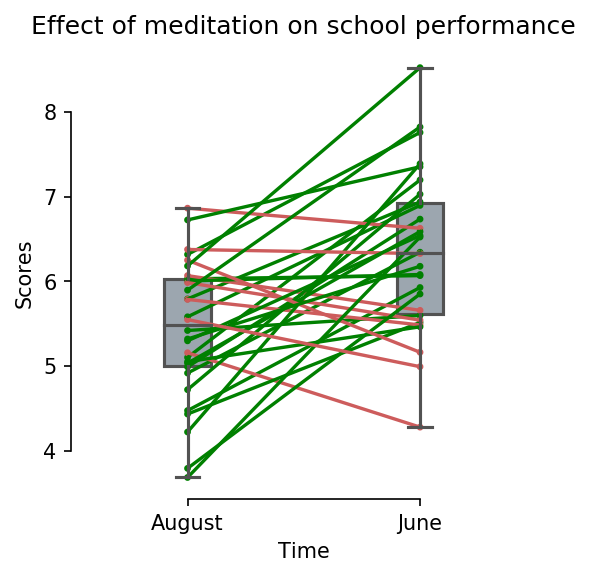

In [81]:
df = pg.read_dataset('mixed_anova').query("Group == 'Meditation' and Time != 'January'")
ax = pg.plot_paired(data=df, dv='Scores', within='Time', subject='Subject', dpi=150)
ax.set_title("Effect of meditation on school performance")

Onw way ANOVA

In [90]:
# Read an example dataset
df = pg.read_dataset('mixed_anova')

# Run the ANOVA
aov = pg.anova(data=df, dv='Scores', between='Group', detailed=True)
print(aov)

   Source          SS   DF        MS         F   p-unc       np2
0   Group    5.459963    1  5.459963  5.243656  0.0232  0.028616
1  Within  185.342729  178  1.041251       NaN     NaN       NaN


In [91]:
pg.rm_anova(data=df, dv='Scores', within='Time', subject='Subject', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2,eps
0,Time,7.628428,2,3.814214,3.912796,0.022629,0.062194,0.998751
1,Error,115.027023,118,0.974805,NaN,NaN,NaN,NaN


One way ANOVA on another dataset

In [86]:
import pingouin as pg
df = pg.read_dataset('anova')
df

,Subject,Hair color,Pain threshold
0,1,Light Blond,62
1,2,Light Blond,60
2,3,Light Blond,71
3,4,Light Blond,55
4,5,Light Blond,48
5,6,Dark Blond,63
6,7,Dark Blond,57
7,8,Dark Blond,52
8,9,Dark Blond,41
9,10,Dark Blond,43


In [87]:
aov = pg.anova(dv='Pain threshold', between='Hair color', data=df,
               detailed=True)
aov.round(3)

,Source,SS,DF,MS,F,p-unc,np2
0,Hair color,1360.726,3,453.575,6.791,0.004,0.576
1,Within,1001.800,15,66.787,NaN,NaN,NaN


Two Way ANOVA

In [88]:
df = pg.read_dataset('anova2')
df

,Ss,Blend,Crop,Yield
0,1,Blend X,Wheat,123
1,2,Blend X,Wheat,156
2,3,Blend X,Wheat,112
3,4,Blend X,Wheat,100
4,5,Blend X,Corn,128
5,6,Blend X,Corn,150
6,7,Blend X,Corn,174
7,8,Blend X,Corn,116
8,9,Blend X,Soy,166
9,10,Blend X,Soy,178


In [89]:
df.anova(dv="Yield", between=["Blend", "Crop"]).round(3)

,Source,SS,DF,MS,F,p-unc,np2
0,Blend,2.042,1,2.042,0.004,0.952,0.000
1,Crop,2736.583,2,1368.292,2.525,0.108,0.219
2,Blend * Crop,2360.083,2,1180.042,2.178,0.142,0.195
3,Residual,9753.250,18,541.847,NaN,NaN,NaN
